# Network Ensembles

#### Import Packages

In [50]:
from drig.networks.networks import TinyVGG
from drig.utils import plot_training_metrics, visualize_network, display_image
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.preprocessing import LabelBinarizer
import cv2

#### Initiliaze paths

In [3]:
model_path=os.path.abspath(os.path.join(os.path.pardir,"models/ensemble_models/"))


#### Load Data

In [4]:
((train_x, train_y),(test_x,test_y))=cifar10.load_data()
train_x=train_x.astype("float")/255.0
test_x=test_x.astype("float")/255.0

#### One-hot encode class labels

In [5]:
label_binarizer=LabelBinarizer()
train_y=label_binarizer.fit_transform(train_y)
test_y=label_binarizer.transform(test_y)

#### Make Class List

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### Initialize Data Augementer

In [7]:
data_augementer=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode="nearest")

In [8]:
number_of_ensemble_models=5

In [9]:
for i in range(0,number_of_ensemble_models):
    epochs=60
    batch_size=64
    print(f"---------TRAINING {i+1} TINYVGG ON CIFAR10--------")
    print(f"--------BUILDING MODEL------------")
    model=TinyVGG.build(width=32,height=32,depth=3,classes=len(classes))
    lr=0.01
    decay=lr/epochs
    optimizer=SGD(learning_rate=lr, decay=decay, momentum=0.9, nesterov=True)
    print(f"--------COMPILING MODEL-----------")
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    step_size=len(train_x)//batch_size
    print(f"--------TRAINING MODEL-----------")
    Z=model.fit(data_augementer.flow(train_x,train_y,batch_size=batch_size), validation_data=(test_x,test_y), 
              epochs=epochs, steps_per_epoch=step_size,verbose=1)
    model.save(f"{model_path}/tiny_vgg_{i+1}.model")
    ######
    print(f"--------RUNNING PREDICTIONS------")
    predictions=model.predict(test_x,batch_size=batch_size)
    
    report=classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1), target_names=classes)
    report_file=open(f"{model_path}/tiny_vgg_{i+1}.txt", mode="w")
    report_file.write(report)
    report_file.close()
    plot_training_metrics(epochs,Z,f"{model_path}/tiny_vgg_{i+1}.png")
    

---------TRAINING 1 TINYVGG ON CIFAR10--------
--------BUILDING MODEL------------
--------COMPILING MODEL-----------
--------TRAINING MODEL-----------
Epoch 1/60
781/781 [==============================] - 28s 35ms/step - loss: 2.1536 - accuracy: 0.3227 - val_loss: 1.3097 - val_accuracy: 0.5252
Epoch 2/60
781/781 [==============================] - 27s 35ms/step - loss: 1.5579 - accuracy: 0.4601 - val_loss: 1.2178 - val_accuracy: 0.5623
Epoch 3/60
781/781 [==============================] - 27s 35ms/step - loss: 1.3888 - accuracy: 0.5163 - val_loss: 1.2914 - val_accuracy: 0.5479
Epoch 4/60
781/781 [==============================] - 27s 35ms/step - loss: 1.2737 - accuracy: 0.5547 - val_loss: 1.2404 - val_accuracy: 0.5793
Epoch 5/60
781/781 [==============================] - 27s 35ms/step - loss: 1.1933 - accuracy: 0.5797 - val_loss: 1.1727 - val_accuracy: 0.6092
Epoch 6/60
781/781 [==============================] - 27s 35ms/step - loss: 1.1244 - accuracy: 0.6037 - val_loss: 1.0938 - val_ac

/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/suyashsrivastava/drig/models/ensemble_models/tiny_vgg_1.model/assets
--------RUNNING PREDICTIONS------


/Users/suyashsrivastava/drig/utils.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


---------TRAINING 2 TINYVGG ON CIFAR10--------
--------BUILDING MODEL------------
--------COMPILING MODEL-----------
--------TRAINING MODEL-----------
Epoch 1/60
781/781 [==============================] - 30s 38ms/step - loss: 2.1622 - accuracy: 0.3180 - val_loss: 1.5175 - val_accuracy: 0.4640
Epoch 2/60
781/781 [==============================] - 29s 37ms/step - loss: 1.5341 - accuracy: 0.4661 - val_loss: 1.2855 - val_accuracy: 0.5524
Epoch 3/60
781/781 [==============================] - 28s 35ms/step - loss: 1.3671 - accuracy: 0.5247 - val_loss: 1.1874 - val_accuracy: 0.5896
Epoch 4/60
781/781 [==============================] - 28s 35ms/step - loss: 1.2569 - accuracy: 0.5610 - val_loss: 1.2752 - val_accuracy: 0.5837
Epoch 5/60
781/781 [==============================] - 30s 38ms/step - loss: 1.1870 - accuracy: 0.5820 - val_loss: 1.2066 - val_accuracy: 0.5969
Epoch 6/60
781/781 [==============================] - 34s 44ms/step - loss: 1.1477 - accuracy: 0.5959 - val_loss: 1.0675 - val_ac

/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/suyashsrivastava/drig/models/ensemble_models/tiny_vgg_2.model/assets
--------RUNNING PREDICTIONS------


/Users/suyashsrivastava/drig/utils.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


---------TRAINING 3 TINYVGG ON CIFAR10--------
--------BUILDING MODEL------------
--------COMPILING MODEL-----------
--------TRAINING MODEL-----------
Epoch 1/60
781/781 [==============================] - 27s 34ms/step - loss: 2.1684 - accuracy: 0.3174 - val_loss: 1.3746 - val_accuracy: 0.5053
Epoch 2/60
781/781 [==============================] - 27s 34ms/step - loss: 1.5561 - accuracy: 0.4611 - val_loss: 1.1929 - val_accuracy: 0.5745
Epoch 3/60
781/781 [==============================] - 27s 34ms/step - loss: 1.3930 - accuracy: 0.5144 - val_loss: 1.1648 - val_accuracy: 0.6015
Epoch 4/60
781/781 [==============================] - 27s 34ms/step - loss: 1.2854 - accuracy: 0.5505 - val_loss: 1.2694 - val_accuracy: 0.5902
Epoch 5/60
781/781 [==============================] - 27s 34ms/step - loss: 1.2088 - accuracy: 0.5753 - val_loss: 1.0904 - val_accuracy: 0.6300
Epoch 6/60
781/781 [==============================] - 27s 34ms/step - loss: 1.1567 - accuracy: 0.5929 - val_loss: 1.1518 - val_ac

/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/suyashsrivastava/drig/models/ensemble_models/tiny_vgg_3.model/assets
--------RUNNING PREDICTIONS------


/Users/suyashsrivastava/drig/utils.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


---------TRAINING 4 TINYVGG ON CIFAR10--------
--------BUILDING MODEL------------
--------COMPILING MODEL-----------
--------TRAINING MODEL-----------
Epoch 1/60
781/781 [==============================] - 29s 37ms/step - loss: 2.1549 - accuracy: 0.3252 - val_loss: 1.5610 - val_accuracy: 0.4581
Epoch 2/60
781/781 [==============================] - 28s 36ms/step - loss: 1.5413 - accuracy: 0.4657 - val_loss: 1.2745 - val_accuracy: 0.5590
Epoch 3/60
781/781 [==============================] - 27s 35ms/step - loss: 1.3820 - accuracy: 0.5177 - val_loss: 1.3122 - val_accuracy: 0.5562
Epoch 4/60
781/781 [==============================] - 27s 35ms/step - loss: 1.2873 - accuracy: 0.5488 - val_loss: 1.2616 - val_accuracy: 0.5730
Epoch 5/60
781/781 [==============================] - 27s 35ms/step - loss: 1.2183 - accuracy: 0.5730 - val_loss: 1.3533 - val_accuracy: 0.5648
Epoch 6/60
781/781 [==============================] - 28s 35ms/step - loss: 1.1642 - accuracy: 0.5898 - val_loss: 1.1549 - val_ac

/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/suyashsrivastava/drig/models/ensemble_models/tiny_vgg_4.model/assets
--------RUNNING PREDICTIONS------


/Users/suyashsrivastava/drig/utils.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


---------TRAINING 5 TINYVGG ON CIFAR10--------
--------BUILDING MODEL------------
--------COMPILING MODEL-----------
--------TRAINING MODEL-----------
Epoch 1/60
781/781 [==============================] - 28s 35ms/step - loss: 2.1280 - accuracy: 0.3328 - val_loss: 1.9007 - val_accuracy: 0.3948
Epoch 2/60
781/781 [==============================] - 28s 36ms/step - loss: 1.5486 - accuracy: 0.4647 - val_loss: 1.3451 - val_accuracy: 0.5219
Epoch 3/60
781/781 [==============================] - 28s 36ms/step - loss: 1.3791 - accuracy: 0.5186 - val_loss: 1.2486 - val_accuracy: 0.5606
Epoch 4/60
781/781 [==============================] - 28s 36ms/step - loss: 1.2639 - accuracy: 0.5549 - val_loss: 1.4947 - val_accuracy: 0.5133
Epoch 5/60
781/781 [==============================] - 29s 38ms/step - loss: 1.1986 - accuracy: 0.5788 - val_loss: 1.3743 - val_accuracy: 0.5702
Epoch 6/60
781/781 [==============================] - 30s 38ms/step - loss: 1.1378 - accuracy: 0.6002 - val_loss: 1.2135 - val_ac

/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/suyashsrivastava/drig/models/ensemble_models/tiny_vgg_5.model/assets
--------RUNNING PREDICTIONS------


/Users/suyashsrivastava/drig/utils.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


#### Visualise Network

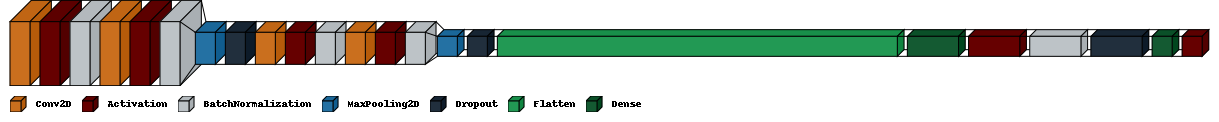

In [27]:
visualize_network(model)

#### Training Report for Ensemble Models

In [45]:
report_files=list(glob.glob(os.path.abspath(os.path.join(os.path.pardir, "models/ensemble_models","*.txt"))))
for file_path in report_files:
    report_file=open(file_path)
    print(report_file.readlines()[15])

weighted avg       0.77      0.74      0.74     10000

weighted avg       0.78      0.75      0.74     10000

weighted avg       0.77      0.73      0.73     10000

weighted avg       0.77      0.74      0.74     10000

weighted avg       0.77      0.74      0.74     10000



#### Training Metrics for Ensemble Models

In [49]:
model_training_graphs=list(glob.glob(os.path.abspath(os.path.join(os.path.pardir, "models/ensemble_models","*.png"))))

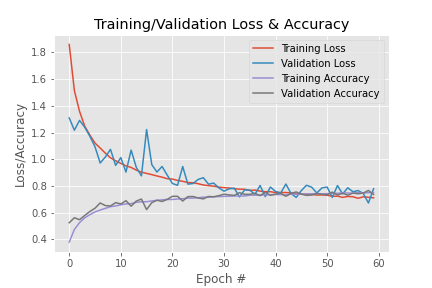

In [53]:
display_image(cv2.imread(model_training_graphs[0]))

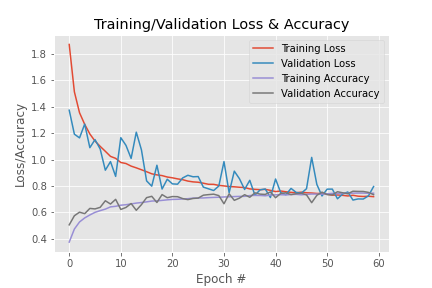

In [54]:
display_image(cv2.imread(model_training_graphs[1]))

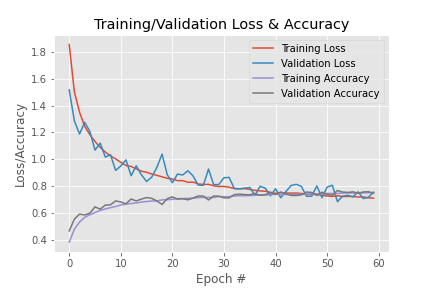

In [55]:
display_image(cv2.imread(model_training_graphs[2]))

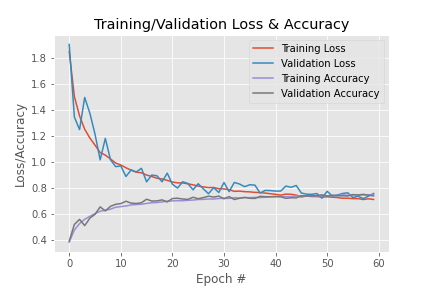

In [56]:
display_image(cv2.imread(model_training_graphs[3]))

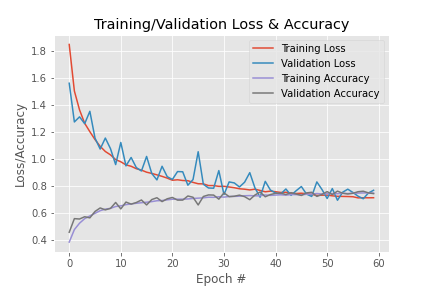

In [57]:
display_image(cv2.imread(model_training_graphs[4]))

#### Evaluating Ensemble

In [18]:
import glob
from keras.models import load_model

#### Load Previously Models

In [19]:
model_paths=list(glob.glob(os.path.abspath(os.path.join(os.path.pardir, "models/ensemble_models","*.model"))))

In [20]:
models=[load_model(model_path) for model_path in model_paths]

#### Run Individual Predictions on Test Data

In [21]:
predictions=list()
for model in models:
    prediction=model.predict(test_x, batch_size=64)
    predictions.append(prediction)

(10000, 10)
(10000, 10)
(10000, 10)
(10000, 10)
(10000, 10)


#### Average Combined Predictions

In [24]:
predictions=np.average(predictions, axis=0)

#### Higher Prediction Accuracy of Ensemble

In [26]:
print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

    airplane       0.85      0.78      0.82      1000
  automobile       0.93      0.89      0.91      1000
        bird       0.85      0.55      0.67      1000
         cat       0.69      0.41      0.52      1000
        deer       0.69      0.74      0.71      1000
         dog       0.84      0.51      0.63      1000
        frog       0.48      0.98      0.64      1000
       horse       0.87      0.82      0.84      1000
        ship       0.88      0.91      0.89      1000
       truck       0.81      0.93      0.87      1000

    accuracy                           0.75     10000
   macro avg       0.79      0.75      0.75     10000
weighted avg       0.79      0.75      0.75     10000

